# Identifying fraud from Enron e-mails

## Table of Contents
* <a href="#sec1">1. Introduction</a>
  * <a href="#sec1.1"> 1.1. Initial statements </a>

* <a href="#sec2">2. Data Wrangling</a>
  * <a href="#sec2.1"> 2.1. Loading the data </a>

* <a href="#sec3">3. Feature selection</a>
  * <a href="#sec3.1"> 3.1. Selecting valid data </a>
  * <a href="#sec3.2"> 3.2. Looking for outliers </a>

<a id='sec1'></a>
## 1. Introduction

<a id='sec1.1'></a>
### 1.1. Initial statements
This section sets up import statements for all the packages that will be used throughout this python notebook.

In [320]:
# Udacity statements
import sys
import pickle
sys.path.append("tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data

# Data analysis packages:
import pandas as pd
import numpy as np
#from datetime import datetime as dt

# Visualization packages:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [321]:
## Forcing pandas to display any number of elements
pd.set_option('display.max_columns', None)
pd.options.display.max_seq_items = 2000

<a id='sec2'></a>
## 2. Data wrangling
Analyzing the data integrity, the expected values and removing outliers.

<a id='sec2.1'></a>
### 2.1. Loading the data

In [357]:
### Load the dictionary containing the dataset
with open("final_project_dataset.pkl", "r") as data_file:
    data_dict = pickle.load(data_file)

In [358]:
## What is the data type and length?
print('Dataset type: ',type(data_dict))
print('Dataset length: ',len(data_dict))

('Dataset type: ', <type 'dict'>)
('Dataset length: ', 146)


In [359]:
## Exploring the dataset through pandas.Dataframe
dataset = pd.DataFrame.from_dict(data_dict, orient='index')
dataset.head()

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,expenses,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
ALLEN PHILLIP K,201955,2902,2869717,4484442,1729541,4175000,126027,1407,-126027,1729541,13868,NaN,2195,152,65,False,NaN,-3081055,304805,phillip.allen@enron.com,47
BADUM JAMES P,NaN,NaN,178980,182466,257817,NaN,NaN,NaN,NaN,257817,3486,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,477,566,NaN,916197,4046157,NaN,1757552,465,-560222,5243487,56301,NaN,29,864523,0,False,NaN,-5104,NaN,james.bannantine@enron.com,39
BAXTER JOHN C,267102,NaN,1295738,5634343,6680544,1200000,3942714,NaN,NaN,10623258,11200,NaN,NaN,2660303,NaN,False,NaN,-1386055,1586055,NaN,NaN
BAY FRANKLIN R,239671,NaN,260455,827696,NaN,400000,145796,NaN,-82782,63014,129142,NaN,NaN,69,NaN,False,NaN,-201641,NaN,frank.bay@enron.com,NaN


<a id='sec2.2'></a>
### 2.2 Analyzing string data:

In [360]:
dataset.describe()

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,expenses,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
count,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146,146
unique,95,87,40,126,102,42,98,84,19,125,95,5,65,93,42,2,18,45,53,112,58
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN
freq,51,60,107,21,44,64,36,60,128,20,51,142,60,53,60,128,129,97,80,35,60


In [361]:
## Checking the feature data type:
features_to_check = []
for col in dataset.columns:
    datatype = type(dataset[col][0])
    print '{} has type {}'.format(col,datatype)
    if datatype is str:
        features_to_check.append(col)

salary has type <type 'int'>
to_messages has type <type 'int'>
deferral_payments has type <type 'int'>
total_payments has type <type 'int'>
exercised_stock_options has type <type 'int'>
bonus has type <type 'int'>
restricted_stock has type <type 'int'>
shared_receipt_with_poi has type <type 'int'>
restricted_stock_deferred has type <type 'int'>
total_stock_value has type <type 'int'>
expenses has type <type 'int'>
loan_advances has type <type 'str'>
from_messages has type <type 'int'>
other has type <type 'int'>
from_this_person_to_poi has type <type 'int'>
poi has type <type 'numpy.bool_'>
director_fees has type <type 'str'>
deferred_income has type <type 'int'>
long_term_incentive has type <type 'int'>
email_address has type <type 'str'>
from_poi_to_this_person has type <type 'int'>


In [362]:
## Printing out the features that must be checked (string types are not iterable!)
features_to_check

['loan_advances', 'director_fees', 'email_address']

From the features above, only *email_address* is expected to contain string type data. In this way, an in-depth look must be done in the other ones.

<a id='sec2.2.1'></a>
#### 2.2.1 Checking *loan_advances* data:
This attribute type is originally *(str type)*. However, it was expected to have financial values. 

In [363]:
dataset['loan_advances'].unique()

array(['NaN', 2000000, 81525000, 400000, 83925000], dtype=object)

Only four instances have *loan_advances* valid values. Checking them out:

In [364]:
dataset[dataset['loan_advances']!='NaN']

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,expenses,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
FREVERT MARK A,1060932,3275,6426990,17252530,10433518,2000000,4188667,2979,NaN,14622185,86987,2000000,21,7427621,6,False,NaN,-3367011,1617011,mark.frevert@enron.com,242
LAY KENNETH L,1072321,4273,202911,103559793,34348384,7000000,14761694,2411,NaN,49110078,99832,81525000,36,10359729,16,True,NaN,-300000,3600000,kenneth.lay@enron.com,123
PICKERING MARK R,655037,898,NaN,1386690,28798,300000,NaN,728,NaN,28798,31653,400000,67,NaN,0,False,NaN,NaN,NaN,mark.pickering@enron.com,7
TOTAL,26704229,NaN,32083396,309886585,311764000,97343619,130322299,NaN,-7576788,434509511,5235198,83925000,NaN,42667589,NaN,False,1398517,-27992891,48521928,NaN,NaN


The first outlier pops out from this data -- the **TOTAL** instance must be removed. Besides it, this feature occurs only for three valid instances, in the way maybe it's not the best feature to feed our classifier.

<a id='sec2.2.2'></a>
#### 2.2.1 Checking *director_fees* data:
As for *loan_advances*, this attribute type is originally *(str type)*. However, it was expected to have financial values too. 

In [365]:
dataset['director_fees'].unique()

array(['NaN', 3285, 137864, 113784, 98784, 102492, 119292, 108750, 112492,
       103750, 38346, 101250, 17500, 125034, 1398517, 36666, 109298, 108579], dtype=object)

In [366]:
dataset[dataset['director_fees']!='NaN']

,salary,to_messages,deferral_payments,total_payments,exercised_stock_options,bonus,restricted_stock,shared_receipt_with_poi,restricted_stock_deferred,total_stock_value,expenses,loan_advances,from_messages,other,from_this_person_to_poi,poi,director_fees,deferred_income,long_term_incentive,email_address,from_poi_to_this_person
BELFER ROBERT,NaN,NaN,-102500,102500,3285,NaN,NaN,NaN,44093,-44093,NaN,NaN,NaN,NaN,NaN,False,3285,NaN,NaN,NaN,NaN
BHATNAGAR SANJAY,NaN,523,NaN,15456290,2604490,NaN,-2604490,463,15456290,NaN,NaN,NaN,29,137864,1,False,137864,NaN,NaN,sanjay.bhatnagar@enron.com,0
BLAKE JR. NORMAN P,NaN,NaN,NaN,1279,NaN,NaN,NaN,NaN,NaN,NaN,1279,NaN,NaN,NaN,NaN,False,113784,-113784,NaN,NaN,NaN
CHAN RONNIE,NaN,NaN,NaN,NaN,NaN,NaN,32460,NaN,-32460,NaN,NaN,NaN,NaN,NaN,NaN,False,98784,-98784,NaN,NaN,NaN
DUNCAN JOHN H,NaN,NaN,NaN,77492,371750,NaN,NaN,NaN,NaN,371750,NaN,NaN,NaN,NaN,NaN,False,102492,-25000,NaN,NaN,NaN
GRAMM WENDY L,NaN,NaN,NaN,119292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,119292,NaN,NaN,NaN,NaN
JAEDICKE ROBERT,NaN,NaN,NaN,83750,431750,NaN,44093,NaN,-44093,431750,NaN,NaN,NaN,NaN,NaN,False,108750,-25000,NaN,NaN,NaN
LEMAISTRE CHARLES,NaN,NaN,NaN,87492,412878,NaN,NaN,NaN,NaN,412878,NaN,NaN,NaN,NaN,NaN,False,112492,-25000,NaN,NaN,NaN
MENDELSOHN JOHN,NaN,NaN,NaN,148,NaN,NaN,NaN,NaN,NaN,NaN,148,NaN,NaN,NaN,NaN,False,103750,-103750,NaN,NaN,NaN
MEYER JEROME J,NaN,NaN,NaN,2151,NaN,NaN,NaN,NaN,NaN,NaN,2151,NaN,NaN,NaN,NaN,False,38346,-38346,NaN,NaN,NaN


Regarding the ***director_fees*** feature, only 17 instances contains valid value. What calls attention in this case is that most of the other features has **NaN** values, which brings suspection that maybe they refers to false names. Surely something that must be checked later. 

<a id='sec2.3'></a>
### 2.3 Removing **TOTAL** instance:
As observed before, the "TOTAL" instance must be removed, since we are interested only on POIs.

In [367]:
dataset.drop('TOTAL',inplace=True)  #Removing the anomalous instance

<a id='sec2.4'></a>
### 2.4 Converting string "NaN" to numpy.NaN
From the previous output, it was clear there are some 'NaN' in string type instead of numerical or numpy type, which causes some troubles when plotting data or using some classifier. Due to this, the next step is to scan the dataset for 'NaN' string and replace it by numpy.NaN.

In [368]:
for column in dataset.columns:
    dataset[column] = dataset[column].apply(lambda x: np.NaN if x == 'NaN' else x)

In [369]:
## Checking the dataset information:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 21 columns):
salary                       94 non-null float64
to_messages                  86 non-null float64
deferral_payments            38 non-null float64
total_payments               124 non-null float64
exercised_stock_options      101 non-null float64
bonus                        81 non-null float64
restricted_stock             109 non-null float64
shared_receipt_with_poi      86 non-null float64
restricted_stock_deferred    17 non-null float64
total_stock_value            125 non-null float64
expenses                     94 non-null float64
loan_advances                3 non-null float64
from_messages                86 non-null float64
other                        92 non-null float64
from_this_person_to_poi      86 non-null float64
poi                          145 non-null bool
director_fees                16 non-null float64
deferred_income              48 non-null float

<a id='sec3'></a>
## 3. Feature selection

<a id='sec3.1'></a>
### 3.1 Selecting valid data
As seen before, there are many null data in our dataset. In order to select the most appropriate features to explore, we will look for those that are present at least in 70% of the dataset. Considering there are 21 features (from which 70% is approximate to 15 features), we will first observe which instances have more than 15 not null values and choose the most complete features from this selection.

In [370]:
notNullDataset = dataset.dropna(thresh=15)

In [371]:
notNullDataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57 entries, ALLEN PHILLIP K to WHALLEY LAWRENCE G
Data columns (total 21 columns):
salary                       57 non-null float64
to_messages                  57 non-null float64
deferral_payments            15 non-null float64
total_payments               57 non-null float64
exercised_stock_options      50 non-null float64
bonus                        53 non-null float64
restricted_stock             56 non-null float64
shared_receipt_with_poi      57 non-null float64
restricted_stock_deferred    6 non-null float64
total_stock_value            56 non-null float64
expenses                     51 non-null float64
loan_advances                2 non-null float64
from_messages                57 non-null float64
other                        57 non-null float64
from_this_person_to_poi      57 non-null float64
poi                          57 non-null bool
director_fees                0 non-null float64
deferred_income              25 non-null floa

From the output above, the features named *deferral_payments; restricted_stock_deferred;* and *director_fees* are removed. Doing so the pre-selected features list becomes:

In [372]:
preFeatures = [u'salary', u'to_messages', u'total_payments',
       u'exercised_stock_options', u'bonus', u'restricted_stock',
       u'shared_receipt_with_poi', u'total_stock_value', u'expenses', u'from_messages',
       u'other', u'from_this_person_to_poi', u'poi', u'deferred_income', u'long_term_incentive', 
       u'email_address', u'from_poi_to_this_person']

Since in the *feature_format()* method the "NaN" strings are replaced by zeros, we need to make this adjustment here.

In [373]:
dataset.fillna(0,inplace=True)

<a id='sec3.2'></a>
### 3.2 Visual pre-selection
The objective here is to visualize how the data is distributed accordingly to the features and selecting those which show a better class distinction. In orther to facilitate the analysis, the features list is splitted into 4 groups before creating their pairplots:

In [374]:
preFeat01 = [u'salary',u'bonus',u'total_payments',u'expenses']
preFeat02 = [u'to_messages', u'from_messages',u'from_poi_to_this_person',u'from_this_person_to_poi']
preFeat03 = [u'exercised_stock_options',u'restricted_stock',u'shared_receipt_with_poi', u'total_stock_value']
preFeat04 = [u'deferred_income', u'long_term_incentive',u'other']

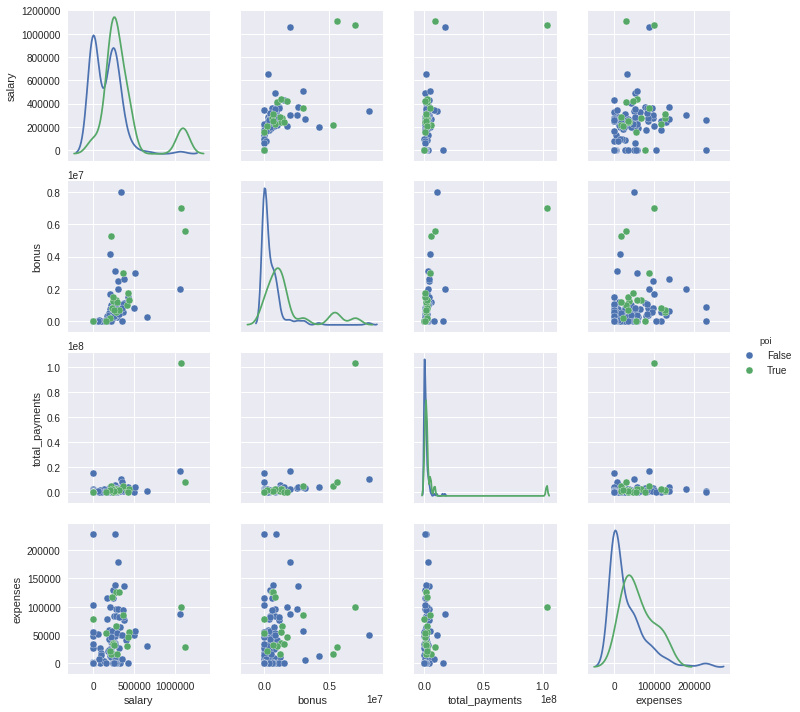

In [375]:
graph = sns.pairplot(dataset, hue="poi", vars=preFeat01, diag_kind='kde')

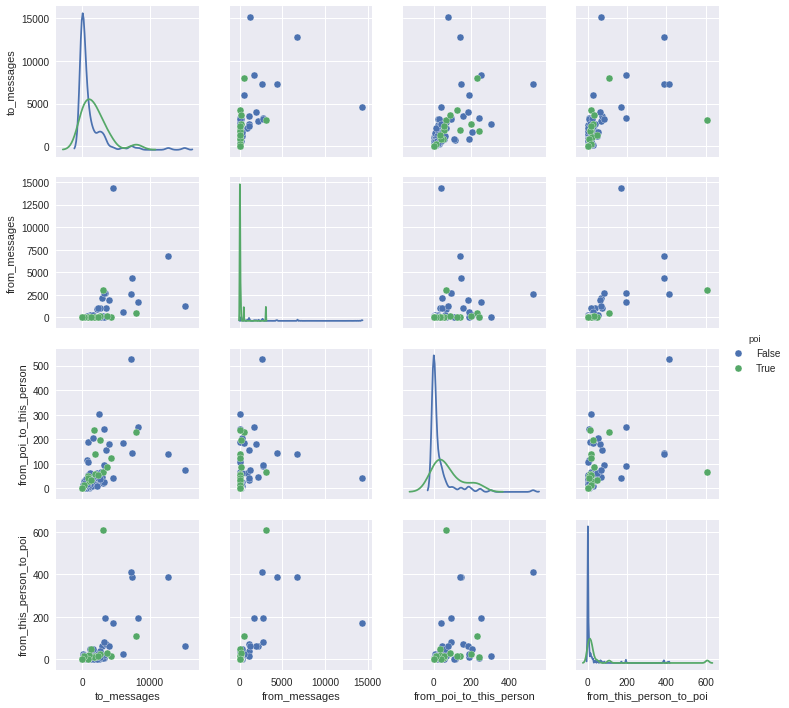

In [376]:
graph = sns.pairplot(dataset, hue="poi", vars=preFeat02, diag_kind='kde')

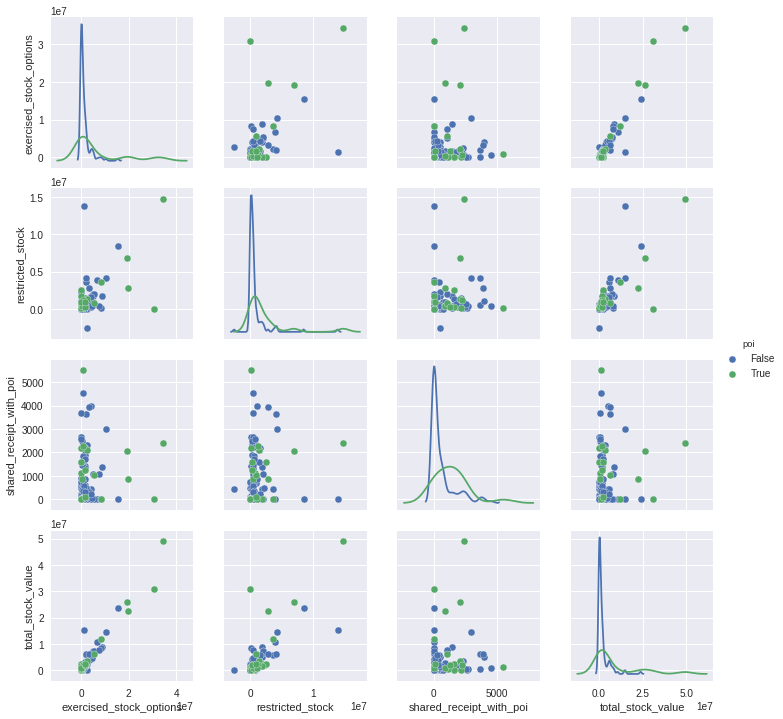

In [377]:
graph = sns.pairplot(dataset, hue="poi", vars=preFeat03, diag_kind='kde')

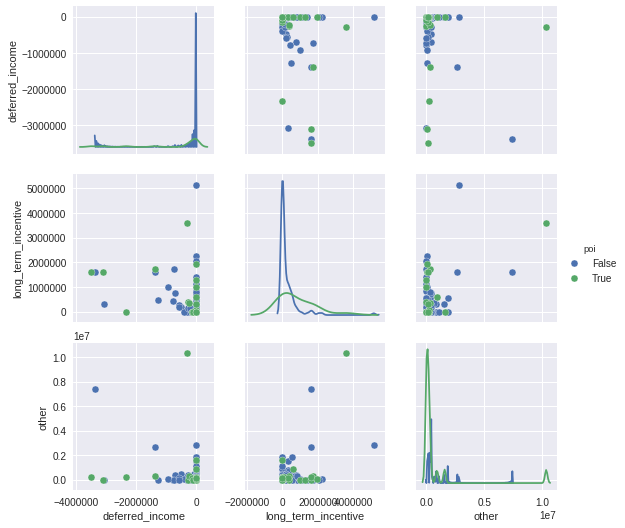

In [378]:
graph = sns.pairplot(dataset, hue="poi", vars=preFeat04, diag_kind='kde')

From the charts above, we select the features attending to the following criteria: (i) distinct univariate distribution for each class; (ii) visual class distinction among two variables correlations. Doing so, the features *other, total_payments* and *expenses* are removed from the previous list and separeted accordingly to its context:

In [379]:
financialFeatures = [u'salary',u'bonus', u'exercised_stock_options',u'restricted_stock',u'shared_receipt_with_poi', 
                     u'total_stock_value', u'deferred_income', u'long_term_incentive']
behavioralFeatures = [u'to_messages', u'from_messages',u'from_poi_to_this_person',u'from_this_person_to_poi']

<a id='sec3.3'></a>
### 3.3 Univariate feature selection

First of all, even though the pre-selected features contains many valid data, all the dataset instances have at least one feature or attribute with an invalid value (NaN), which may break many of the algorithms we want to run with. In this case, we will apply the code suggested in (https://stackoverflow.com/questions/30317119/classifiers-in-scikit-learn-that-handle-nan-null) to replace the NaN values for the dataset mean. 

Considering the financial data have some important outliers, mainly related to some POI, it is important to use a different strategy for NaN replacing than the *mean*, which will be the *median* in this case. 

In [380]:
from sklearn.preprocessing import Imputer

# Create our imputer to replace missing values with the mean e.g.
imp = Imputer(missing_values='NaN', strategy='median', axis=0)
imp = imp.fit(dataset[financialFeatures])

imputerData = imp.transform(dataset[financialFeatures])
financialDataset = pd.DataFrame(imputerData, index=dataset.index, columns=financialFeatures)

In [381]:
## Checking the consistency of the new dataset:
financialDataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 145 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 8 columns):
salary                     145 non-null float64
bonus                      145 non-null float64
exercised_stock_options    145 non-null float64
restricted_stock           145 non-null float64
shared_receipt_with_poi    145 non-null float64
total_stock_value          145 non-null float64
deferred_income            145 non-null float64
long_term_incentive        145 non-null float64
dtypes: float64(8)
memory usage: 15.2+ KB


The code below is based on the example available in http://scikit-learn.org/stable/auto_examples/feature_selection/plot_feature_selection.html#sphx-glr-auto-examples-feature-selection-plot-feature-selection-py, in which an univariate feature selection is applied. 

In [382]:
from sklearn.feature_selection import SelectPercentile, f_classif

selectorDataset = financialDataset
selectorLabel = dataset['poi']

# #############################################################################
# Univariate feature selection with F-test for feature scoring
# We use the default selection function: the 5% most significant features
selector = SelectPercentile(f_classif, percentile=5)
selector.fit(selectorDataset, selectorLabel)

SelectPercentile(percentile=5,
         score_func=<function f_classif at 0x7fdcc6743500>)

<Container object of 8 artists>

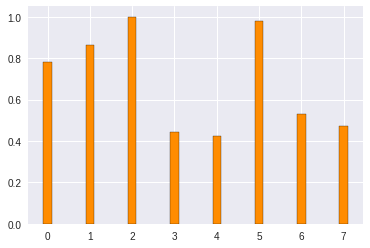

In [383]:
## Plotting the features selection: 
X_indices = np.arange(selectorDataset.shape[-1])
scores = -np.log10(selector.pvalues_)
scores /= scores.max()
plt.bar(X_indices, scores, width=.2,
        label=r'Univariate score ($-Log(p_{value})$)', color='darkorange',
        edgecolor='black')

In [384]:
## Printing out the selected financial features: 
for ix, pval in enumerate(scores):
    if pval > 0.45:
        print financialFeatures[ix],': ',pval

salary :  0.781868634496
bonus :  0.865701390131
exercised_stock_options :  1.0
total_stock_value :  0.979465489013
deferred_income :  0.528826943386
long_term_incentive :  0.4727358214


In [385]:
financialFeatures

[u'salary',
 u'bonus',
 u'exercised_stock_options',
 u'restricted_stock',
 u'shared_receipt_with_poi',
 u'total_stock_value',
 u'deferred_income',
 u'long_term_incentive']

In [386]:
my_dataset = dataset.to_dict(orient='index')
features_list = ['poi','salary','bonus','exercised_stock_options','total_stock_value',
                 'deferred_income','long_term_incentive']

### Extract features and labels from dataset for local testing
data = featureFormat(my_dataset, features_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

#%%## Task 4: Try a varity of classifiers
### Please name your classifier clf for easy export below.
### Note that if you want to do PCA or other multi-stage operations,
### you'll need to use Pipelines. For more info:
### http://scikit-learn.org/stable/modules/pipeline.html

In [387]:
features

[array([  201955.,  4175000.,  1729541.,  1729541., -3081055.,   304805.]),
 array([      0.,       0.,  257817.,  257817.,       0.,       0.]),
 array([  4.77000000e+02,   0.00000000e+00,   4.04615700e+06,
          5.24348700e+06,  -5.10400000e+03,   0.00000000e+00]),
 array([   267102.,   1200000.,   6680544.,  10623258.,  -1386055.,
          1586055.]),
 array([ 239671.,  400000.,       0.,   63014., -201641.,       0.]),
 array([   80818.,        0.,  1599641.,  1599641.,        0.,    93750.]),
 array([ 231330.,  700000.,       0.,  126027.,       0.,       0.]),
 array([  213999.,  5249999.,   953136.,  1110705., -2334434.,        0.]),
 array([     0.,      0.,   3285., -44093.,      0.,      0.]),
 array([  216582.,        0.,  1624396.,  2493616.,        0.,        0.]),
 array([ 187922.,  250000.,       0.,  659249., -485813.,  180250.]),
 array([       0.,        0.,  2604490.,        0.,        0.,        0.]),
 array([  213625.,  1000000.,  1465734.,  1843816.,        0

In [388]:
labels

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0]

In [389]:
# Provided to give you a starting point. Try a variety of classifiers.
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()

#%%## Task 5: Tune your classifier to achieve better than .3 precision and recall 
### using our testing script. Check the tester.py script in the final project
### folder for details on the evaluation method, especially the test_classifier
### function. Because of the small size of the dataset, the script uses
### stratified shuffle split cross validation. For more info: 
### http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.StratifiedShuffleSplit.html

# Example starting point. Try investigating other evaluation techniques!
from sklearn.cross_validation import train_test_split
features_train, features_test, labels_train, labels_test = \
    train_test_split(features, labels, test_size=0.3, random_state=42)
    
clf.fit(features_train,labels_train)
clf.score(features_test,labels_test)

0.9285714285714286

In [390]:
#%%## Task 6: Dump your classifier, dataset, and features_list so anyone can
### check your results. You do not need to change anything below, but make sure
### that the version of poi_id.py that you submit can be run on its own and
### generates the necessary .pkl files for validating your results.

dump_classifier_and_data(clf, my_dataset, features_list)